In [22]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}

E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 144542 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.18-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.18-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [0]:
!mkdir -p drive
!google-drive-ocamlfuse drive

In [24]:
!ls drive

'16 lık flashın içindekiler v2'  '‎Melih Akkaya kişisinden belge'
 Akademik			  MNIST
 CNN				  projeler
 Colabbasla			  python
 colab_kullanim			  Resmi
'Colab Notebooks'		  Titanic
'Elektrik devreleri nielson'	  Uçak_elektronik_hesaplar.py
 fashion_mnist			  Udemy_DerinOgrenmeyeGiris
 FILE_iqr0hw3t2aqyg_oumesaj.PDF   variartirma
 GANs				  veri
"GitHub'dan_dosya_çekme.ipynb"	 "Wing's Club.xlsx"
 Led_icin


In [25]:
import os
os.chdir("/content/drive/GANs")
!pwd

/content/drive/GANs


In [26]:
!ls

GANs_uygulama.ipynb


In [0]:
!pip install -q keras

In [28]:
from keras.layers import Dense,Dropout,Input,ReLU
from keras.models import Model,Sequential
from keras.optimizers import Adam
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt


Using TensorFlow backend.


In [29]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


In [30]:

#0 ile 255 arasında olan değeri 0 ile 1 arasına sıkıştırmak için yapıyoruz
#buna benzer işlemler hep yapıyoruz ama mantığını hala tam anlayamadım elimize ne geçiyo??????????
x_train=(x_train.astype(np.float32)-127.5)/127.5
print("İlk baştaki x_train boyutları",x_train.shape)
x_train=x_train.reshape(x_train.shape[0],x_train.shape[1]*x_train.shape[2])
print("Düzenledikten sonraki x_train boyutları:",x_train.shape)

İlk baştaki x_train boyutları (60000, 28, 28)
Düzenledikten sonraki x_train boyutları: (60000, 784)


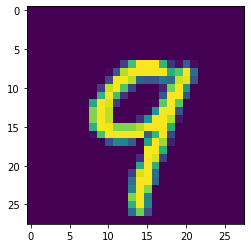

In [31]:
#datanın görselleştirilmesi
plt.imshow(x_test[12])

In [32]:
#generator un oluşturma kısmı ilk nöral network
def create_generator():
  generator=Sequential() #layerları üstüne ekleyeceğimiz yapı
  generator.add(Dense(units=512,input_dim=100))
  generator.add(ReLU())

  generator.add(Dense(units=512))
  generator.add(ReLU())

  generator.add(Dense(units=1024))
  generator.add(ReLU())

  generator.add(Dense(units=784,activation="tanh"))

#artık generatoru compile edebiliriz.ihtiyacımız olanlar parantezin içinde.neden binarycrosentropy çünkü outputlar iki tane fake ya da değil
#beta öğrenme hızı yani kendini güncelleme hızı
  generator.compile(loss="binary_crossentropy",
                    optimizer=Adam(lr=0.0001,beta_1=0.5))
  return generator
g=create_generator()
g.summary







Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fb807069ba8>>

In [33]:
#discriminator
def create_discriminator():
  discriminator=Sequential()
  discriminator.add(Dense(units=1024,input_dim=784))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  
  discriminator.add(Dense(units=512))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  
  discriminator.add(Dense(units=256,))
  discriminator.add(ReLU())
  discriminator.add(Dropout(0.4))

  
  discriminator.add(Dense(units=1,activation="sigmoid"))
  discriminator.compile(loss="binary_crossentropy",
                        optimizer=Adam(lr=0.0001,beta_1=0.5))
  return discriminator

d=create_discriminator()
d.summary




Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


<bound method Network.summary of <keras.engine.sequential.Sequential object at 0x7fb80633be80>>

In [41]:
#GANs
def create_gan(discriminator,generator):
  discriminator.trainable=False# Madem eğitmeyecektik ne diye  aktivasyon fonksizyonlarından geçirdik biz bunu
  gan_input=Input(shape=(100,))
  x=generator(gan_input)
  gan_output=discriminator(x)
  gan=Model(inputs=gan_input,outputs=gan_output)
  gan.compile(loss="binary_crossentropy",optimizer="adam")
  return gan

gan=create_gan(d,g)
gan.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 100)               0         
_________________________________________________________________
sequential_1 (Sequential)    (None, 784)               1643280   
_________________________________________________________________
sequential_2 (Sequential)    (None, 1)                 1460225   
Total params: 3,103,505
Trainable params: 1,643,280
Non-trainable params: 1,460,225
_________________________________________________________________


In [42]:
epochs=50
batch_size=256

for e in range(epochs):
  for _ in range(batch_size):
    noise=np.random.normal(0,1,[batch_size,100])
    generated_images=g.predict(noise)
    image_batch=x_train[np.random.randint(low=0,high=x_train.shape[0],size=batch_size)]
    x=np.concatenate([image_batch,generated_images])#gerçek resimlerle generated resimleri birleştiriyoruz
    
    y_dis=np.zeros(batch_size*2)# 512 tane 0 üretilmesi labellar için
    y_dis[:batch_size]=1 #ürettiği sıfırların 256 tanesini 1 yapılması # ilk 256 tanesi 1 çünkü

    d.trainable=True
    d.train_on_batch(x,y_dis)

    noise=np.random.normal(0,1,[batch_size,100])#discriminant eğitimi gerçekleştirilirken gerarator modelimi de eğitmem laızm

    y_gen=np.ones(batch_size)
    d.trainable=False
    gan.train_on_batch(noise,y_gen)
print("epochs:",e)


epochs: 49


In [0]:
g.save_weights("GANs_model.h5")

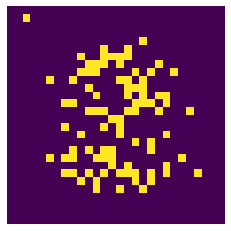

In [49]:
noise=np.random.normal(loc=0,scale=1,size=[100,100])
generated_images=g.predict(noise)# hala şu predict ne yaptığını tam bilmiyorum
generated_images=generated_images.reshape(100,28,28)

plt.imshow(generated_images[15],interpolation='nearest')
plt.axis("off")
plt.show()